# Hierarchical Clustering with python

Build an Hierarchical Clustering model (Agglomerative clustering model) to group the universities given in the 'universities.csv' dataset into groups or clusters based on their similar characters.

In [72]:
# import hierarchical clustering libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [73]:
# Importing the dataset
univ = pd.read_csv("Universities.csv")

In [74]:
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [75]:
univ.shape

(25, 7)

In [76]:
univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [77]:
univ.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [78]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [79]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(univ.iloc[:, 1:])

In [80]:
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [81]:
df_norm.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.637659,0.673333,0.331579,0.353684,0.340508,0.657333
std,0.264292,0.269915,0.259570,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.573171,0.638889,0.131579,0.263158,0.117293,0.466667
50%,0.682927,0.736111,0.289474,0.315789,0.343515,0.766667
75%,0.817073,0.861111,0.473684,0.421053,0.476864,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


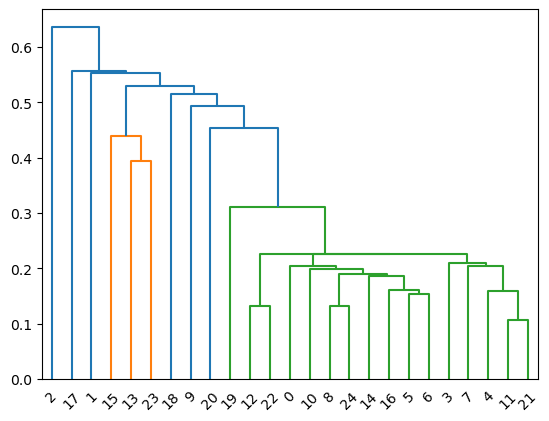

In [82]:
# create a dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [83]:
# create clusters :
# number of clusters should be determined after examining the dendrogram
# creating an instance or object of AgglomerativeClustering()
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [84]:
# save the clusters for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [85]:
# storing the clusters in a dataframe
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])

In [86]:
Clusters.head()

,Clusters
0,0
1,0
2,1
3,0
4,0


In [87]:
# adding the 'cluster' labels to our 'df_norm' dataframe
df_norm['h_clusterid'] = Clusters

In [88]:
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,0
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,0
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,1
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,0
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,0


In [89]:
df_norm.groupby(['h_clusterid']).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
h_clusterid,,,,,,
0,0.658643,0.698671,0.304348,0.334096,0.357184,0.707246
1,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
2,0.170732,0.291667,0.697368,1.000000,0.000000,0.000000


In [90]:
# in the above dataframe the values are normalized and it is hard to make sense out of it

# let's combine he clusterid column to our original university dataframe
univ_final = univ
univ_final['h_clusterid'] = Clusters
univ_final.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0


In [91]:
univ_final.groupby(['h_clusterid']).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
h_clusterid,,,,,,
0,1275.043478,78.304348,37.130435,12.347826,28303.043478,88.217391
1,1260.000000,62.000000,59.000000,9.000000,25026.000000,72.000000
2,1075.000000,49.000000,67.000000,25.000000,8704.000000,67.000000


In [92]:
# Naming the clusters or cluster profiling
# syntax = df.loc[condition, col_name] = new_value
univ_final.loc[univ['h_clusterid'] == 0, "h_clusterid"] = "Best Univ"
univ_final.loc[univ['h_clusterid'] == 1, "h_clusterid"] = "Average Univ"
univ_final.loc[univ['h_clusterid'] == 2, "h_clusterid"] = "Poor Univ"

In [93]:
univ_final.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,Best Univ
1,CalTech,1415,100,25,6,63575,81,Best Univ
2,CMU,1260,62,59,9,25026,72,Average Univ
3,Columbia,1310,76,24,12,31510,88,Best Univ
4,Cornell,1280,83,33,13,21864,90,Best Univ


In [94]:
univ_final.groupby(['h_clusterid']).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
h_clusterid,,,,,,
Average Univ,1260.000000,62.000000,59.000000,9.000000,25026.000000,72.000000
Best Univ,1275.043478,78.304348,37.130435,12.347826,28303.043478,88.217391
Poor Univ,1075.000000,49.000000,67.000000,25.000000,8704.000000,67.000000


In [ ]:
# Now we can use the above dataframe to train a supervised machine learning algorithm